# Data Transformation

Data in different scales.

Values in a dataset might have a variety of different magnitudes, ranges, or scales.
Algorithms that use distance as a parameter may not weigh all these in the same way.
There are various data transformation techniques that are used to transform the features of our data so that they use the same scale, magnitude, or range.
This ensures that each feature has an appropriate effect on a model's predictions.
Some features in our data might have high-magnitude values (for example, annual salary), while others might have relatively low values (for example, the number of years worked at a company). Just because some data has smaller values does not mean it is less significant.

Reference: Data Science with Python
By Rohan Chopra, Aaron England, Mohamed Noordeen Alaudeen
July 2019

https://subscription.packtpub.com/book/data/9781838552862/1/ch01lvl1sec08/data-in-different-scales

# Implementing Scaling Using the Standard Scaler Method

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('Wholesale customers data.csv')

In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
dtypes = df.dtypes
dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Perform standard scaling and print the first five rows of the new dataset. To do so, use the StandardScaler() class from sklearn.preprocessing and implement the fit_transorm() method.
Using the StandardScaler method, we will scale the data into a uniform unit over all the columns.
The values of all the features will be converted into a uniform range of the same scale. Because of this, it becomes easier for the model to make predictions.

In [9]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit_transform(df)
scaled_frame = pd.DataFrame(std_scale, columns=df.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Implementing Scaling Using the MinMax Scaler Method

Perform MinMax scaling and print the initial five values of the new dataset. To do so, use the MinMaxScaler() class from sklearn.preprocessing and implement the fit_transorm() method. Add the following code to implement this:
Using the MinMaxScaler method, we will scale the data into a uniform unit over all the columns

In [10]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)
scaled_frame = pd.DataFrame(minmax_scale,columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [12]:
#Total de lo que se gastó por leche por región
total_milk_by_region = df.groupby("Region")["Milk"].sum()
print (total_milk_by_region)

Region
1     422454
2     239144
3    1888759
Name: Milk, dtype: int64


In [13]:
#Total de lo que se gastó de abarrotes por canal
total_grocery_by_channel = df.groupby("Channel")["Grocery"].sum()
print (total_grocery_by_channel)

Channel
1    1180717
2    2317845
Name: Grocery, dtype: int64


In [19]:
#Normalización entre -1 y 1
from sklearn import preprocessing
new_scale = preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(df)
scalednew_frame = pd.DataFrame(new_scale,columns=df.columns)
scalednew_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,-0.774120,-0.738546,-0.837072,-0.993787,-0.869146,-0.944305
1,1.0,1.0,-0.874202,-0.734352,-0.793807,-0.942903,-0.838820,-0.926033
2,1.0,1.0,-0.886757,-0.761638,-0.834420,-0.921767,-0.827895,-0.672883
3,-1.0,1.0,-0.763491,-0.968928,-0.909072,-0.790316,-0.975309,-0.925532
4,1.0,1.0,-0.596747,-0.854173,-0.844897,-0.872132,-0.913090,-0.783813


array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

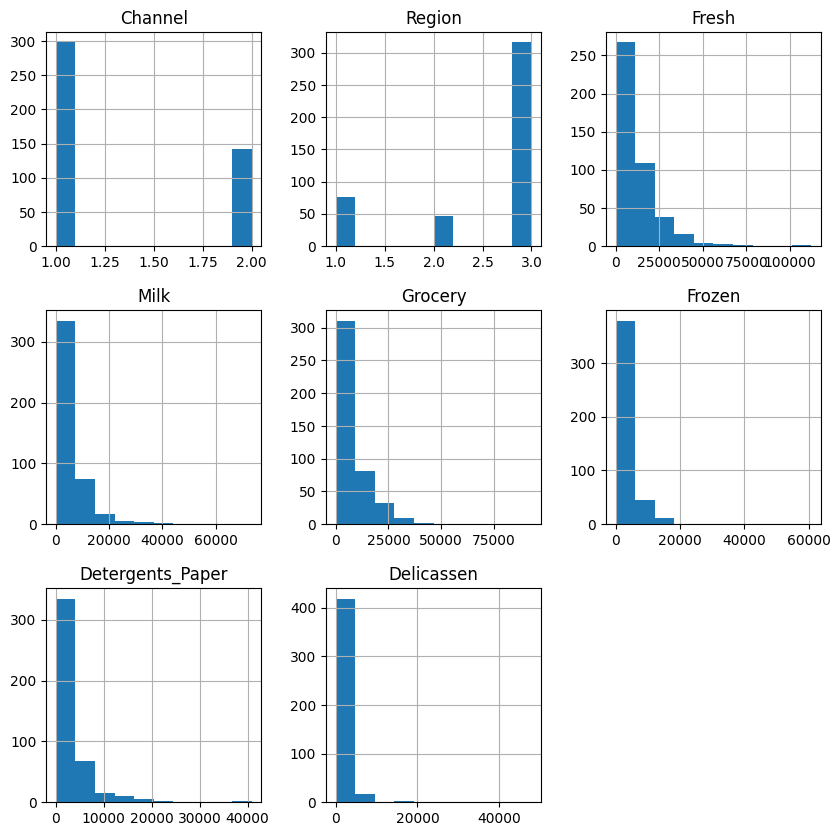

In [15]:
#histograma df original
df.hist(figsize=(10,10))

array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

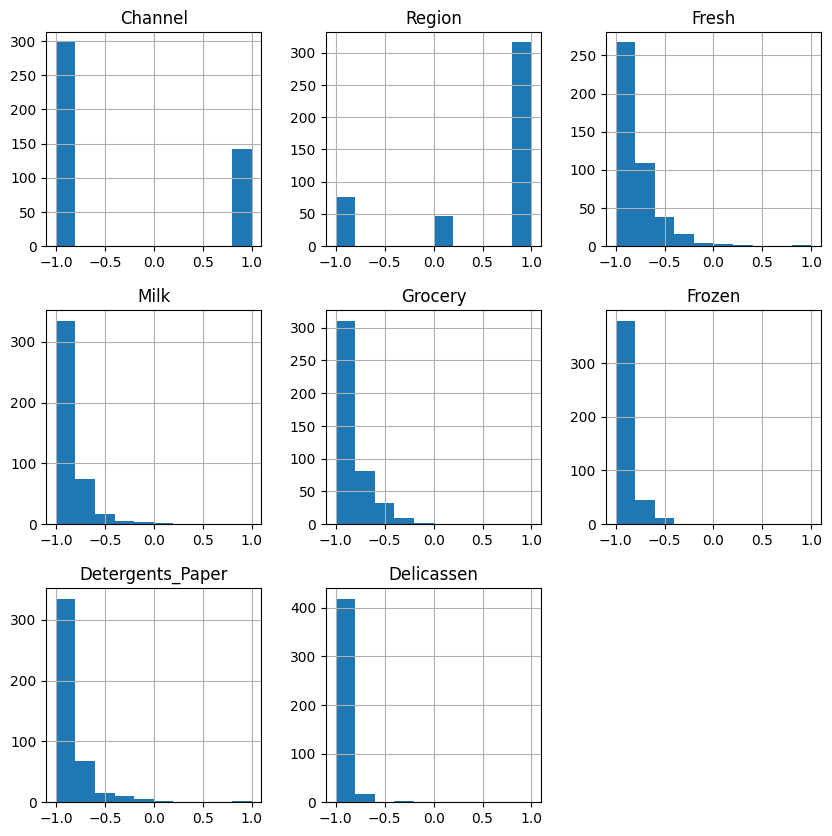

In [20]:
#Histograma de la db normalizada entre -1 y 1
scalednew_frame.hist(figsize=(10,10))

### One hot encoding

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {'Nombre': ['Ana', 'Luis', 'Sofía', 'Pedro', 'Elena'],
        'Ciudad': ['Monterrey', 'Guadalajara', 'CDMX', 'Monterrey', 'Guadalajara'],
        'Edad': [25, 30, 28, 35, 27],
        }
df = pd.DataFrame(data)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
   Edad  Nombre_Ana  Nombre_Elena  Nombre_Luis  Nombre_Pedro  Nombre_Sofía  \
0    25         1.0           0.0          0.0           0.0           0.0   
1    30         0.0           0.0          1.0           0.0           0.0   
2    28         0.0           0.0          0.0           0.0           1.0   
3    35         0.0           0.0          0.0           1.0           0.0   
4    27         0.0           1.0          0.0           0.0           0.0   

   Ciudad_CDMX  Ciudad_Guadalajara  Ciudad_Monterrey  
0          0.0                 0.0               1.0  
1          0.0                 1.0               0.0  
2          1.0                 0.0               0.0  
3          0.0                 0.0               1.0  
4          0.0                 1.0               0.0  


In [24]:
dataf = pd.read_csv('courseEvaluations.csv')
dataf.head()

,Timestamp,Name of Student,Registration number,Describe the course contents and course design in terms of level of preparedness [Course contents],Describe the course contents and course design in terms of level of preparedness [Teacher preparedness],Describe the course contents and course design in terms of level of preparedness [Student engagement],Describe the course contents and course design in terms of level of preparedness [Course coverage],Describe the course contents and course design in terms of level of preparedness [Discussion and respond to questions],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at start of course],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at end of course],...,Skill and responsiveness of the instructor [Instructor was available and helpful],Skill and responsiveness of the instructor [Grading was prompt and had useful feedback],Course content [Learning objectives were clear],Course content [Course content was organized and well planned],Course content [Course workload was appropriate],Course content [Course organized to allow all students to participate fully],What aspects of this course were most useful or valuable?,How would you improve this course?,Describe the experience of engagement in the project assigned in this course,Name one skill or aspect that you gained after completing this course
0,5/25/2024 14:54:06,Arhum Waseem,1024-BSME-FET/F-21,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,...,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output,By Providing Slides To Students,Learning experience beyond text book level ext...,Life long learning
1,5/25/2024 14:56:59,Saud Asif,990-FET/BSME/F21,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj...",Introduce projects that connect students with ...,Learning experience beyond text book level ext...,Identifying the end users and Response gatheri...
2,5/25/2024 14:59:14,Muhammad Hammad Sohail,1012-FET/BSME/F21,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df...",One things i wanna improve in this course is i...,Learning experience beyond text book level ext...,"Product development cycle, Use of Modern tools..."
3,5/25/2024 15:07:56,Muhammad Amir Taj,997/F21/BSME,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...,I think the course was perfect.,Learning experience beyond text book level ext...,"Use of Modern tools in product development, Li..."
4,5/25/2024 15:12:51,M.Talha saoud,1002/bsme/f-21,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...,Please add some content related to entrepreneu...,Learning experience beyond text book level ext...,Life long learning
